<img src="https://www.nintendo.com/content/dam/noa/en_US/games/switch/a/animal-crossing-new-horizons-switch/screenshot-gallery/animal-crossing-new-horizons-switch-screenshot06.jpg" alt="animal crossing screenshot" width="600"/>

# Intro to Data Science... with Animal Crossing!
## What is this?

First things first, this is a Jupyter notebook. It's composed of text cells, like this one.

In [1]:
message = "It also has code cells like this one."
print(message)

It also has code cells like this one.


Any output from a code cell is displayed once you run the cell, just like what happened above. 

For now, just think of this notebook as a Python script broken up into small pieces, which you can more easily interact with (hence ipynb).

## Loading the data
We're going to be working with data describing Animal Crossing [villagers](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv), available [online](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-05-05/readme.md).

In [2]:
# the link to the data
villager_data = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv'

That link leads to a CSV file, which is great for storing data but hard for us to work with. We can use a library called __pandas__ to parse those CSV files into a more readable form. [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool for Python.

In [3]:
# import the pandas module and make it referenceable locally as pd
import pandas as pd 

We can use a method `pd.read_csv()` to load the villager data file into a pandas `DataFrame` object, which you can think of as a table. We can use a method `DataFrame.head()` to peek at the dataframe's contents

In [4]:
villagers = pd.read_csv(villager_data)
villagers.head()

,row_n,id,name,gender,species,birthday,personality,song,phrase,full_id,url
0,2,admiral,Admiral,male,bird,1-27,cranky,Steep Hill,aye aye,villager-admiral,https://villagerdb.com/images/villagers/thumb/...
1,3,agent-s,Agent S,female,squirrel,7-2,peppy,DJ K.K.,sidekick,villager-agent-s,https://villagerdb.com/images/villagers/thumb/...
2,4,agnes,Agnes,female,pig,4-21,uchi,K.K. House,snuffle,villager-agnes,https://villagerdb.com/images/villagers/thumb/...
3,6,al,Al,male,gorilla,10-18,lazy,Steep Hill,Ayyeeee,villager-al,https://villagerdb.com/images/villagers/thumb/...
4,7,alfonso,Alfonso,male,alligator,6-9,lazy,Forest Life,it'sa me,villager-alfonso,https://villagerdb.com/images/villagers/thumb/...


In [5]:
villagers.tail()

,row_n,id,name,gender,species,birthday,personality,song,phrase,full_id,url
386,475,winnie,Winnie,female,horse,1-31,peppy,My Place,hay-OK,villager-winnie,https://villagerdb.com/images/villagers/thumb/...
387,477,wolfgang,Wolfgang,male,wolf,11-25,cranky,K.K. Song,snarrrl,villager-wolfgang,https://villagerdb.com/images/villagers/thumb/...
388,480,yuka,Yuka,female,koala,7-20,snooty,Soulful K.K.,tsk tsk,villager-yuka,https://villagerdb.com/images/villagers/thumb/...
389,481,zell,Zell,male,deer,6-7,smug,K.K. D&B,pronk,villager-zell,https://villagerdb.com/images/villagers/thumb/...
390,483,zucker,Zucker,male,octopus,3-8,lazy,Spring Blossoms,bloop,villager-zucker,https://villagerdb.com/images/villagers/thumb/...


In [6]:
len(villagers)

391

So... what are we looking at?

In [7]:
villagers.columns

Index(['row_n', 'id', 'name', 'gender', 'species', 'birthday', 'personality',
       'song', 'phrase', 'full_id', 'url'],
      dtype='object')

We can zoom in on any subset of those columns like so

In [8]:
villagers_col_subset = villagers[['name', 'species', 'personality']]
villagers_col_subset.head()

,name,species,personality
0,Admiral,bird,cranky
1,Agent S,squirrel,peppy
2,Agnes,pig,uchi
3,Al,gorilla,lazy
4,Alfonso,alligator,lazy


We can zoom in on any one of our villages using the `DataFrame.iloc()` function

In [9]:
villager_number = 320
villagers.iloc[villager_number]

row_n                                                        396
id                                                          rudy
name                                                        Rudy
gender                                                      male
species                                                      cat
birthday                                                   12-20
personality                                                 jock
song                                                 The K. Funk
phrase                                                    tokana
full_id                                            villager-rudy
url            https://villagerdb.com/images/villagers/thumb/...
Name: 320, dtype: object

Let's take a look at some of the images!

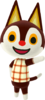

In [10]:
villager_image_url = villagers.iloc[villager_number]['url']

import requests
import IPython.display as Disp

Disp.Image(requests.get(villager_image_url).content)

We can also select a row based on a villager's name using what's called a boolean indexer.

In [11]:
villager_name = 'Beau'
name_row = villagers[villagers['name']==villager_name]
name_row

,row_n,id,name,gender,species,birthday,personality,song,phrase,full_id,url
30,35,beau,Beau,male,deer,4-5,lazy,Mountain Song,saltlick,villager-beau,https://villagerdb.com/images/villagers/thumb/...


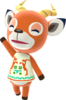

In [12]:
Disp.Image(requests.get(name_row['url'].values[0]).content)

So, by now we've learned to
- load in a Pandas DataFrame 
- take a look at the data it contains using `.head()` and `.tail()`
- 'focus' on specific columns or rows
- display an image from its url

We can do the same thing with Animal Crossing items (or any other data set)

In [13]:
# load the data
item_data = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/items.csv'
items = pd.read_csv(item_data)
# look at the data
items.head()

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
0,12,3d-glasses,3D Glasses,Accessories,NaN,122.0,bells,490.0,bells,NaN,NaN,NaN,NaN,nh,item-3d-glasses,https://villagerdb.com/images/items/full/3d-gl...
1,14,a-tee,A Tee,Tops,NaN,140.0,bells,560.0,bells,NaN,NaN,NaN,NaN,nh,item-a-tee,https://villagerdb.com/images/items/full/a-tee...
2,17,abstract-wall,Abstract Wall,Wallpaper,True,390.0,bells,1560.0,bells,Nook's Cranny,NaN,NaN,NaN,nh,NaN,NaN
3,19,academy-uniform,Academy Uniform,Dresses,NaN,520.0,bells,2080.0,bells,NaN,NaN,NaN,NaN,nh,item-academy-uniform,https://villagerdb.com/images/items/full/acade...
4,20,acanthostega,Acanthostega,Fossils,False,2000.0,bells,NaN,NaN,Underground (dig spot),NaN,NaN,NaN,nh,item-acanthostega,https://villagerdb.com/images/items/thumb/acan...


In [14]:
# look at a subset of the columns
items_colsubset = items[['name', 'category', 'image_url']]
items_colsubset.head()

,name,category,image_url
0,3D Glasses,Accessories,https://villagerdb.com/images/items/full/3d-gl...
1,A Tee,Tops,https://villagerdb.com/images/items/full/a-tee...
2,Abstract Wall,Wallpaper,NaN
3,Academy Uniform,Dresses,https://villagerdb.com/images/items/full/acade...
4,Acanthostega,Fossils,https://villagerdb.com/images/items/thumb/acan...


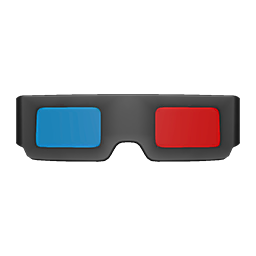

In [15]:
# look at a subset of rows and display an image
item_number = 0
item_image_url = items_colsubset.iloc[item_number]['image_url']
Disp.Image(requests.get(item_image_url).content)

## A closer look at the data (or, data cleaning and manipulation with Pandas)

First, let's print a quick summary of all the numerical data.

In [16]:
items.head()

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
0,12,3d-glasses,3D Glasses,Accessories,NaN,122.0,bells,490.0,bells,NaN,NaN,NaN,NaN,nh,item-3d-glasses,https://villagerdb.com/images/items/full/3d-gl...
1,14,a-tee,A Tee,Tops,NaN,140.0,bells,560.0,bells,NaN,NaN,NaN,NaN,nh,item-a-tee,https://villagerdb.com/images/items/full/a-tee...
2,17,abstract-wall,Abstract Wall,Wallpaper,True,390.0,bells,1560.0,bells,Nook's Cranny,NaN,NaN,NaN,nh,NaN,NaN
3,19,academy-uniform,Academy Uniform,Dresses,NaN,520.0,bells,2080.0,bells,NaN,NaN,NaN,NaN,nh,item-academy-uniform,https://villagerdb.com/images/items/full/acade...
4,20,acanthostega,Acanthostega,Fossils,False,2000.0,bells,NaN,NaN,Underground (dig spot),NaN,NaN,NaN,nh,item-acanthostega,https://villagerdb.com/images/items/thumb/acan...


In [17]:
items.describe()

,num_id,sell_value,buy_value,recipe
count,4565.000000,4529.000000,3.551000e+03,588.000000
mean,3661.618839,2261.378229,6.959650e+03,4.710884
std,2187.950090,11313.225932,3.432609e+04,6.494507
min,12.000000,5.000000,4.000000e+01,1.000000
25%,1722.000000,240.000000,8.700000e+02,2.000000
50%,3569.000000,390.000000,1.300000e+03,3.000000
75%,5607.000000,1000.000000,2.700000e+03,6.000000
max,7443.000000,300000.000000,1.200000e+06,90.000000


Let's investigate a column with strings, such as the category column. We can start by finding all the unique values in the column.

In [18]:
items['category'].unique()

array(['Accessories', 'Tops', 'Wallpaper', 'Dresses', 'Fossils',
       'Furniture', 'Bottoms', 'Hats', 'Usables', 'Photos', 'Socks',
       'Music', 'Bugs', 'Flooring', 'Fish', 'Shoes', 'Umbrellas', 'Fruit',
       'Tools', 'Flowers', 'Seashells'], dtype=object)

It's also useful to be able to get statistics on the frequency of values for any column.

In [19]:
species_frequencies = villagers['species'].value_counts() # returns series with index as the species
species_frequencies.head(n=10)

cat         23
rabbit      20
squirrel    18
frog        18
duck        17
dog         16
cub         16
pig         15
mouse       15
horse       15
Name: species, dtype: int64

In [20]:
category_frequencies = items['category'].value_counts()
category_frequencies.head(n=10)

Furniture      1264
Photos          840
Flooring        324
Tops            289
Wallpaper       255
Dresses         239
Hats            230
Bottoms         142
Accessories     123
Flowers         109
Name: category, dtype: int64

If you want to replace values in the dataset, that's also pretty straightforward. You can use the selector and assign to it like a variable.

In [21]:
items.iloc[0]

num_id                                                          12
id                                                      3d-glasses
name                                                    3D Glasses
category                                               Accessories
orderable                                                      NaN
sell_value                                                     122
sell_currency                                                bells
buy_value                                                      490
buy_currency                                                 bells
sources                                                        NaN
customizable                                                   NaN
recipe                                                         NaN
recipe_id                                                      NaN
games_id                                                        nh
id_full                                            item-3d-gla

In [22]:
items.loc[0, 'name'] = '5D Glasses'
items.loc[0, 'id'] = '5d-glasses'
items.head(n=1)

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
0,12,5d-glasses,5D Glasses,Accessories,NaN,122.0,bells,490.0,bells,NaN,NaN,NaN,NaN,nh,item-3d-glasses,https://villagerdb.com/images/items/full/3d-gl...


The `replace` method is also handy if you're trying to change multiple values.

In [23]:
items['category'] = items['category'].replace('Music', 'Musique')
items[items['category'] == 'Musique'].head()

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
20,40,agent-kk,Agent K.K.,Musique,True,800.0,bells,3200.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN
35,62,aloha-kk,Aloha K.K.,Musique,True,800.0,bells,3200.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN
72,119,animal-city,Animal City,Musique,NaN,800.0,bells,3200.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN
577,907,bubblegum-kk,Bubblegum K.K.,Musique,True,800.0,bells,3200.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN
687,1021,cafe-kk,Café K.K.,Musique,True,800.0,bells,3200.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN


An NaN, or "Not a Number," appears in the dataframe when a value does not exist. The simplest way to deal with this might be to ignore the rows with columns for which an NaN is unacceptable.

In [24]:
null_rows = items['recipe'].isnull() | items['recipe_id'].isnull() # returns Series of bool
items_with_recipe = items[~null_rows]

# compare number of rows after filtering
print('items # rows: ' + str(len(items.index)))
print('items filtered # rows: ' + str(len(items_with_recipe.index)))

items # rows: 4565
items filtered # rows: 588


In [25]:
items_with_recipe.head(n=3)

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
13,31,acoustic-guitar,Acoustic Guitar,Furniture,NaN,3210.0,bells,12840.0,bells,NaN,TRUE,8.0,softwood,nh,item-acoustic-guitar,https://villagerdb.com/images/items/thumb/acou...
14,31,acoustic-guitar,Acoustic Guitar,Furniture,NaN,3210.0,bells,12840.0,bells,NaN,TRUE,3.0,iron-nugget,nh,item-acoustic-guitar,https://villagerdb.com/images/items/thumb/acou...
66,114,angled-signpost,Angled Signpost,Furniture,NaN,600.0,bells,2400.0,bells,NaN,TRUE,2.0,hardwood,nh,item-angled-signpost,https://villagerdb.com/images/items/thumb/angl...


Another way to deal with NaNs is to fill in certain values. You could fill in NaN urls with a blank url, for example. You could also imagine filling a column of numeric values with the mean of that column, as calculated by the `DataFrame.mean` method.

In [26]:
items_filled = items['image_url'].fillna("")
items_filled.head(n=3)

0    https://villagerdb.com/images/items/full/3d-gl...
1    https://villagerdb.com/images/items/full/a-tee...
2                                                     
Name: image_url, dtype: object

## Visualizing the data


matplotlib is a library that allows us to create strong visualizations in Python. There are so many options, from interactive to animated and beyond, but today let's keep it simple: we can start with a histogram for villager personality.

In [27]:
import matplotlib.pyplot as plt

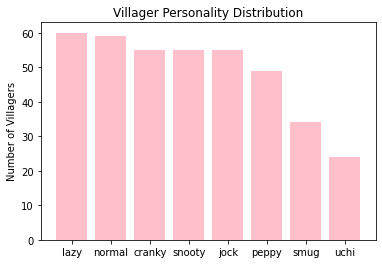

In [36]:
villagers['personality'].value_counts()
names = villagers['personality'].value_counts().keys()
vals = villagers['personality'].value_counts().values
plt.bar(names, vals, color='pink')
plt.title('Villager Personality Distribution')
plt.ylabel('Number of Villagers')
plt.show()

The "color" part of the above code just changes it from its default blue to a much prettier pink. We can also set this bar graph up to change color by value, in more normally distributed datasets(since many of the values here are the same, we're unlikely to get anything interesting with that.)

We can also create a KDE plot, which is a type of plot that can let you visualize the probability density at different values. You can also contrast it with the histogram above. This plot shows you the distribution. 

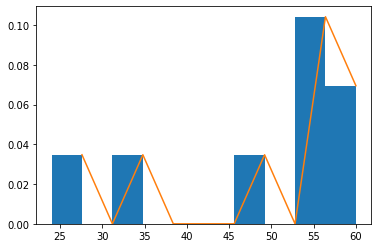

In [37]:
a = plt.hist(vals,density=True)

plt.plot(a[1][1:],a[0])
plt.show()

More realistically, you can generate density plots from more continuous distributions like item sell value.

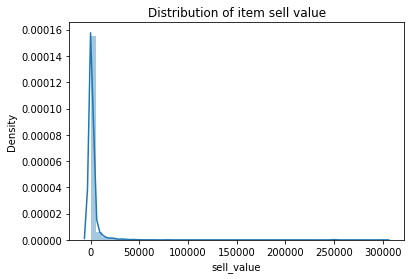

In [43]:
import seaborn as sns
sns.distplot(items['sell_value'])
plt.title('Distribution of item sell value')
plt.ylabel('Density')
plt.show()

We see that all the entries are piled up around 0, except for a few items with very high sell value. If we adjust these values by taking the log, we can better visualize the distribution.

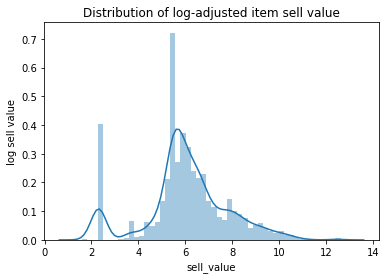

In [45]:
import seaborn as sns
import numpy as np
sns.distplot(np.log(items['sell_value']))
plt.title('Distribution of log-adjusted item sell value')
plt.ylabel('Density')
plt.ylabel('log sell value')
plt.show()

With other data, it can be interesting and highly informative to create scatter plots, lines of best fit, and interactive histograms, all possible with matplotlib! If you're interested, check out the [docs](https://matplotlib.org/) and feel free to ask any questions. 